# Classification for predicting the Purchase (split into 4 categories)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('BlackFriday.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Only use the following features (X variables) in your models:
# Gender, Age, City_Category, Stay_In_Current_City_Years, Marital_Status
data = data.drop(columns=["User_ID", "Product_ID", "Occupation", "Product_Category_2", "Product_Category_3"])

In [5]:
# Check if there are any missing values
if data.isnull().values.any():
    print("Missing values found")
else:
    print("No missing values found")

No missing values found


In [6]:
# Label encoding or ordinal categorical variables
from sklearn.preprocessing import LabelEncoder

data["Age"] = LabelEncoder().fit_transform(data["Age"])
data["Gender"] = LabelEncoder().fit_transform(data["Gender"])
data["Stay_In_Current_City_Years"] = LabelEncoder().fit_transform(data["Stay_In_Current_City_Years"])


In [7]:
# one-hot encoding of categorical variables with more than 2 unique values
one_hot_columns = ['City_Category']
data = pd.get_dummies(data=data, columns=one_hot_columns)

In [8]:
data.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,City_Category_A,City_Category_B,City_Category_C
0,0,0,2,0,3,8370,1,0,0
1,0,0,2,0,1,15200,1,0,0
2,0,0,2,0,12,1422,1,0,0
3,0,0,2,0,12,1057,1,0,0
4,1,6,4,0,8,7969,0,0,1


In [9]:
# Replacing Nan values by 0
data = data.fillna(0)

In [10]:
# Convert Purchase variable into category variable by dividing values into 4 ranges
data['category'] = 999
data.loc[np.logical_and(data['Purchase']>0, data['Purchase']<=6000), 'category'] = 0
data.loc[np.logical_and(data['Purchase']>6000, data['Purchase']<=9334), 'category'] = 1
data.loc[np.logical_and(data['Purchase']>9334, data['Purchase']<=13000), 'category'] = 2
data.loc[np.logical_and(data['Purchase']>13000, data['Purchase']<=24000), 'category'] = 3
data = data.drop(columns="Purchase")

In [11]:
data.head(10)

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,City_Category_A,City_Category_B,City_Category_C,category
0,0,0,2,0,3,1,0,0,1
1,0,0,2,0,1,1,0,0,3
2,0,0,2,0,12,1,0,0,0
3,0,0,2,0,12,1,0,0,0
4,1,6,4,0,8,0,0,1,1
5,1,2,3,0,1,1,0,0,3
6,1,4,2,1,1,0,1,0,3
7,1,4,2,1,1,0,1,0,3
8,1,4,2,1,1,0,1,0,3
9,1,2,1,1,8,1,0,0,1


In [12]:
from sklearn.model_selection import train_test_split

# define the X and y variables
X = data.drop(columns="category")
y = data["category"]

# Instruction: split the dataset to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

print("The length of the train dataset is: ", len(X_train))
print("The length of the test dataset is: ", len(X_test))

The length of the train dataset is:  322546
The length of the test dataset is:  215031


# 1. Logistic Regression 

In [13]:
# Fit linear regression model on training data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
# Make predictions on test data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = lr.predict(X_test)

In [15]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[13298 41123     0  4315]
 [ 9230 52761     0  8165]
 [ 4740 14297     0 19196]
 [ 5200 10326     0 32380]]


In [16]:
# Accuracy score and classification report
print("Accuracy score is: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))

Accuracy score is:  0.45778980705107636

Classification report:
               precision    recall  f1-score   support

           0       0.41      0.23      0.29     58736
           1       0.45      0.75      0.56     70156
           2       0.00      0.00      0.00     38233
           3       0.51      0.68      0.58     47906

   micro avg       0.46      0.46      0.46    215031
   macro avg       0.34      0.41      0.36    215031
weighted avg       0.37      0.46      0.39    215031



/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 2. Decision Tree Classifier

In [17]:
# Decision tree with max_depth = 3
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=13)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [18]:
# Make predictions on test data
predictions = tree.predict(X_test)

In [19]:
# Confusion matrix
confusion_matrix(y_test, predictions)

array([[ 4659, 48701,  1549,  3827],
       [    0, 59529,  3199,  7428],
       [    0, 13736,  7243, 17254],
       [    0,  6025,  5624, 36257]])

In [20]:
# Accuracy score and classification report
print("Accuracy score is: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))
### It is predicting only two classes since the max_depth of tree is only 3

Accuracy score is:  0.5008022099139194

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.15     58736
           1       0.47      0.85      0.60     70156
           2       0.41      0.19      0.26     38233
           3       0.56      0.76      0.64     47906

   micro avg       0.50      0.50      0.50    215031
   macro avg       0.61      0.47      0.41    215031
weighted avg       0.62      0.50      0.43    215031



In [21]:
# Print the tree image
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

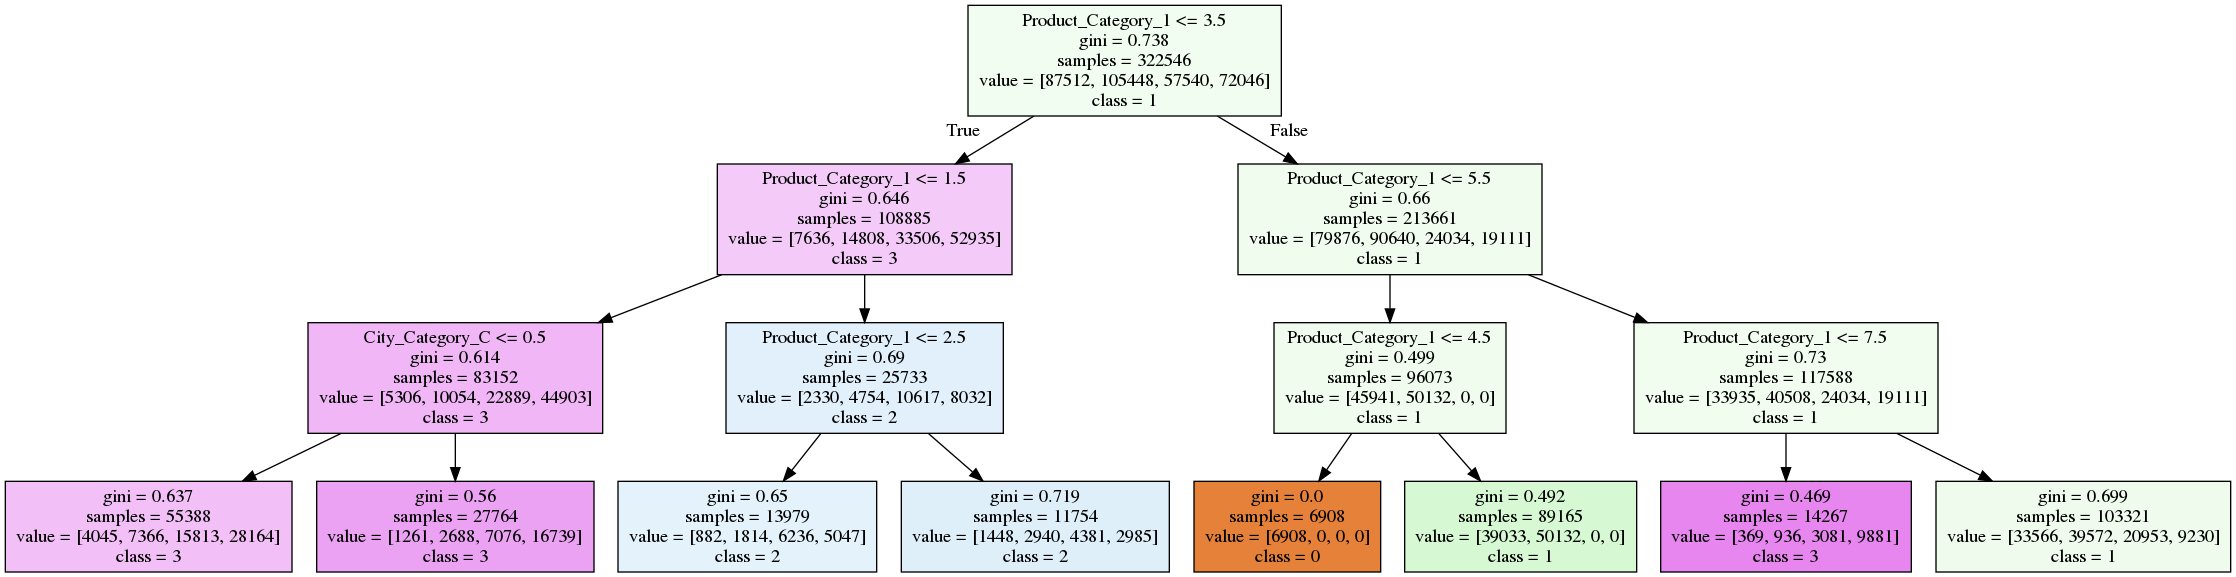

In [22]:
# print decision tree
graph = print_tree(tree, features=X_train.columns, class_names= ['0', '1', '2', '3'])
graph.write_png("tree.png")
Image(graph.create_png())

# 3. Random Forest Classifier

In [23]:
# Random forest regressor with with different values of max_features
from sklearn.ensemble import RandomForestClassifier

max_features = len(data.columns)-1

rfc = RandomForestClassifier(max_features=6, random_state=13)
rfc.fit(X_train, y_train)

/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [24]:
# Make predictions on test data
predictions = rfc.predict(X_test)

In [25]:
# Confusion matrix
confusion_matrix(y_test, predictions)

array([[22339, 30532,  1476,  4389],
       [ 8408, 50050,  3346,  8352],
       [  175, 11747,  6578, 19733],
       [  161,   351,  4587, 42807]])

In [26]:
# Accuracy score and classification report
print("Accuracy score is: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))

Accuracy score is:  0.5663090438122875

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.38      0.50     58736
           1       0.54      0.71      0.61     70156
           2       0.41      0.17      0.24     38233
           3       0.57      0.89      0.69     47906

   micro avg       0.57      0.57      0.57    215031
   macro avg       0.56      0.54      0.51    215031
weighted avg       0.57      0.57      0.53    215031



In [27]:
# Play around with the setting for max_features
for i in range(1, max_features+1):
    rf2 = RandomForestClassifier(max_features=i, random_state=13)
    rf2.fit(X_train, y_train)
    pred1 = rf2.predict(X_test)
    print("Accuracy for %s feature(s) equals %s" %(i, accuracy_score(y_test, pred1)))

/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 1 feature(s) equals 0.5657509847417349


/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 2 feature(s) equals 0.5658067906487901


/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 3 feature(s) equals 0.5662160339671954


/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 4 feature(s) equals 0.5662532379052323


/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 5 feature(s) equals 0.5663648497193428


/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 6 feature(s) equals 0.5663090438122875


/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 7 feature(s) equals 0.5662485874129777


/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 8 feature(s) equals 0.5663136943045421


# 4. KNeighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
nnc = KNeighborsClassifier(n_neighbors=2)
nnc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
# Make predictions on test data
predictions = nnc.predict(X_test)

In [30]:
# Confusion matrix
confusion_matrix(y_test, predictions)

array([[38393, 16229,  2864,  1250],
       [34353, 27498,  5961,  2344],
       [ 8089, 12868, 11356,  5920],
       [ 6393,  9689, 17349, 14475]])

In [31]:
# Accuracy score and classification report
print("Accuracy score is: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))

Accuracy score is:  0.42655245057689356

Classification report:
               precision    recall  f1-score   support

           0       0.44      0.65      0.53     58736
           1       0.41      0.39      0.40     70156
           2       0.30      0.30      0.30     38233
           3       0.60      0.30      0.40     47906

   micro avg       0.43      0.43      0.43    215031
   macro avg       0.44      0.41      0.41    215031
weighted avg       0.44      0.43      0.42    215031



# 5. MLP Classifier 

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
nn = MLPClassifier(
    hidden_layer_sizes=(3,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [34]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=9, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
# Make predictions on test data
predictions = nn.predict(X_test)

In [36]:
# Confusion matrix
confusion_matrix(y_test, predictions)

array([[11707, 42421,     0,  4608],
       [ 3768, 58315,     0,  8073],
       [ 1705, 16905,     0, 19623],
       [ 3991, 10763,     0, 33152]])

In [37]:
# Accuracy score and classification report
print("Accuracy score is: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))

Accuracy score is:  0.47980988787663176

Classification report:
               precision    recall  f1-score   support

           0       0.55      0.20      0.29     58736
           1       0.45      0.83      0.59     70156
           2       0.00      0.00      0.00     38233
           3       0.51      0.69      0.58     47906

   micro avg       0.48      0.48      0.48    215031
   macro avg       0.38      0.43      0.37    215031
weighted avg       0.41      0.48      0.40    215031



/home/rahi/anaconda3/envs/ixprt/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
